# Year 1 Design - Emission Beams
April 29, 2022

In [1]:
import numpy as np
import pandas as pd
import scipy.ndimage
from scipy.spatial import ConvexHull, Delaunay
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from neurophotonics.sim import Tissue
from neurophotonics import demix, fields
from neurophotonics.demix import SpikeSNR, Sample, Demix
from neurophotonics.probe.probely import Probe, ProbeGroup
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.animation as animation
import datajoint as dj

Connecting tdincer84@rds.datajoint.io:3306


## 1. Design Definitions

In [2]:
def design101(save=False, output="Design_v101.csv"):
    # Design 1 - 30 um separation - 75 degrees

    # Create 3 Probes at 0, 0, 0
    # 360 e-pixels
    P1 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P1",
    )

    # 4036 d-pixels
    P2 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[22, 240],
        d_box_length=5,
        d_box_sep=0,
        d_box_vertical_margin=5,
        d_box_horizontal_margin=5,
        name="P2",
    )

    P2.e_pixels = []

    # 360 e-pixels
    P3 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P3",
    )

    PG = ProbeGroup([P1, P2, P3])

    # Position the Probes
    PG.probes[0].translate([-150, 0, 0])
    PG.probes[0].rotate_around(["br", "tr"], -75)

    PG.probes[2].translate([150, 0, 0])
    PG.probes[2].rotate_around(["bl", "tl"], 75)

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG


def design102(save=False, output="Design_v102.csv"):
    # Design 1 - 60 um separation - 75 degrees

    # Create 3 Probes at 0, 0, 0
    # 360 e-pixels
    P1 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P1",
    )

    # 4036 d-pixels
    P2 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[22, 240],
        d_box_length=5,
        d_box_sep=0,
        d_box_vertical_margin=5,
        d_box_horizontal_margin=5,
        name="P2",
    )

    P2.e_pixels = []

    # 360 e-pixels
    P3 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P3",
    )

    PG = ProbeGroup([P1, P2, P3])

    # Position the Probes
    PG.probes[0].translate([-180, 0, 0])
    PG.probes[0].rotate_around(["br", "tr"], -75)

    PG.probes[2].translate([180, 0, 0])
    PG.probes[2].rotate_around(["bl", "tl"], 75)

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG


def design103(save=False, output="Design_v103.csv"):
    # Design 1 - 120 um separation - 75 degrees

    # Create 3 Probes at 0, 0, 0
    # 360 e-pixels
    P1 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P1",
    )

    # 4036 d-pixels
    P2 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[22, 240],
        d_box_length=5,
        d_box_sep=0,
        d_box_vertical_margin=5,
        d_box_horizontal_margin=5,
        name="P2",
    )

    P2.e_pixels = []

    # 360 e-pixels
    P3 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P3",
    )

    PG = ProbeGroup([P1, P2, P3])

    # Position the Probes
    PG.probes[0].translate([-240, 0, 0])
    PG.probes[0].rotate_around(["br", "tr"], -75)

    PG.probes[2].translate([240, 0, 0])
    PG.probes[2].rotate_around(["bl", "tl"], 75)

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG

In [3]:
D101 = design101()
D102 = design102()
D103 = design103()

/Users/tdincer/DJRepos/wci_pytest/neurophotonics/neurophotonics/probe/probely.py:322: RuntimeWarning: Mean of empty slice.
  xs -= xs.mean()
/Users/tdincer/opt/miniconda3/envs/djdev/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tdincer/DJRepos/wci_pytest/neurophotonics/neurophotonics/probe/probely.py:331: RuntimeWarning: Mean of empty slice.
  zs -= zs.mean()


## 5. Emitter Beams
### 5.1 Single Beam Top View

In [4]:
beam_topview = np.load('topview.npy')

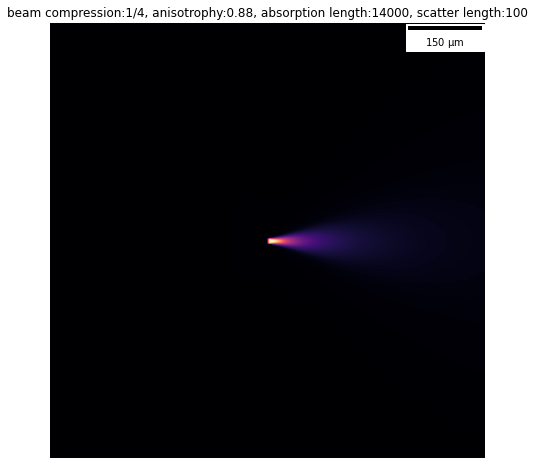

In [5]:
def plot_single_beam(image):
    fig, ax = plt.subplots(figsize=(8, 8))
    gamma = 0.7
    ax.imshow(image[300:700, 300:700], cmap="magma")
    scalebar = ScaleBar(2.2 * 1e-6)
    ax.add_artist(scalebar)
    ax.axis('off')
    ax.set_title(f'beam compression:1/4, anisotrophy:0.88, absorption length:14000, scatter length:100')
    plt.show()

plot_single_beam(image=beam_topview)

### 5.1 Beam Animation

Number of frames: 11


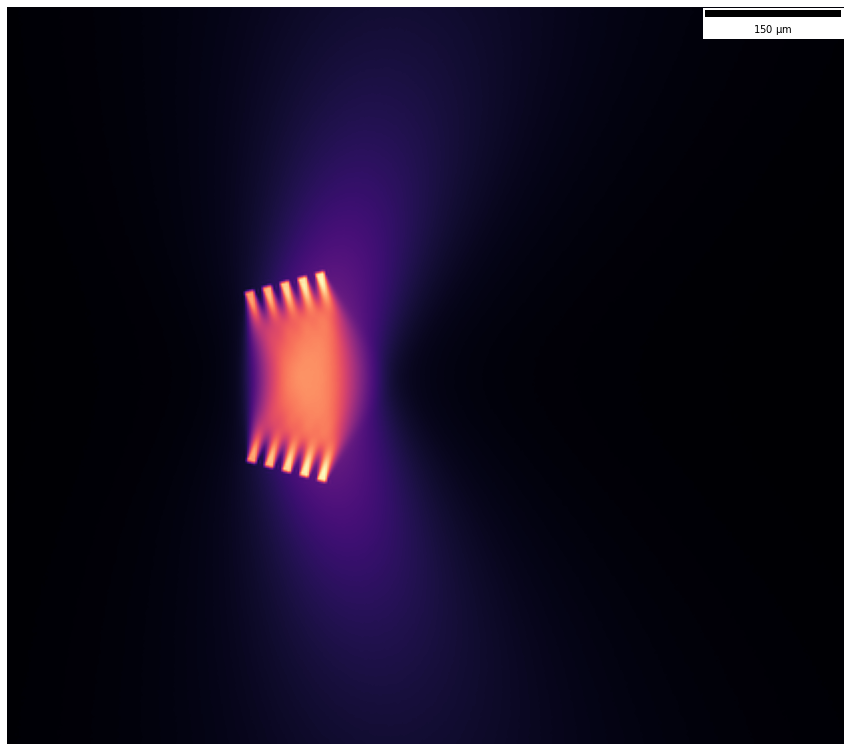

In [6]:
def create_beam_pattern(beam_2d, PG, add=False):
    centroids0 = np.array([e_pixel.centroid for e_pixel in PG.probes[0].e_pixels])
    centroids2 = np.array([e_pixel.centroid for e_pixel in PG.probes[2].e_pixels])

    angle0 = np.arctan(PG.probes[0].e_pixels[0].n[1] / PG.probes[0].e_pixels[0].n[0]) * 180 / np.pi
    angle2 = np.arctan(PG.probes[2].e_pixels[0].n[1] / PG.probes[2].e_pixels[0].n[0]) * 180 / np.pi

    top_five0 = centroids0[np.argsort(centroids0[:, -1])[:5]][:, :2]  # make it 2d
    top_five2 = centroids2[np.argsort(centroids2[:, -1])[:5]][:, :2]  # make it 2d

    images = [scipy.ndimage.shift(scipy.ndimage.rotate(beam_2d, 270 - angle2), [i[0] / 2.2, i[1] / 2.2]) for i in top_five0] + [scipy.ndimage.shift(scipy.ndimage.rotate(beam_2d, 90 + angle2), [i[0] / 2.2, i[1] / 2.2]) for i in top_five2]

    for image in images:
        image[image < 0] = 0  # Rotation (cubic interpolation) makes some pixels to have negative values
    
    if add:
        return sum(images)
    else:
        return images

def crop_images(images, pct=0.35):
    """
    This function crops the images symmetrically by a percentage of the length.
    The images are assumed to be squares.
    inputs:
    -------
    pct: float (0, 0.5]
    """
    # This function crops the images symmetrically by a percentage of the length.
    # The images are assumed to be squares.
    start = int(images[0].shape[0] * 0.35)
    stop = int(images[0].shape[0] * (1 - 0.35))
    
    return [image[start:stop, 500:550 + (stop-start)] for image in images]

images = create_beam_pattern(beam_topview, D101)
images = crop_images(images, pct=0.35)

def create_animation(images, output):
    fig, ax = plt.subplots(figsize=(15,15))
    
    images = [np.zeros([images[0].shape[0], images[0].shape[1]])] + images # Add a blank image to the beginning.
    print(f"Number of frames: {len(images)}")


    ims = []
    i0 = images[0]
    for j, image in enumerate(images):
        if not j ==0:
            i0 += image
        im = ax.imshow(i0, animated=True, cmap="magma")
        scalebar = ScaleBar(2.2 * 1e-6)
        ax.add_artist(scalebar)
        ax.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=800, blit=True,
                                    repeat_delay=1500)

    writer = animation.FFMpegWriter(
        fps=2, bitrate=1800)  # metadata=dict(artist='DataJoint')
    ani.save(output, writer=writer)
    
create_animation(images, output="Design101_emissionbeams_topview.mp4")

## 5.2 Emission Beams of all Design 1 Settings

In [7]:
image101 = create_beam_pattern(beam_topview, D101, add=True)
image102 = create_beam_pattern(beam_topview, D102, add=True)
image103 = create_beam_pattern(beam_topview, D103, add=True)

image101 = crop_images([image101], 0.35)[0]
image102 = crop_images([image102], 0.35)[0]
image103 = crop_images([image103], 0.35)[0]

In [8]:
def plot(images, package='matplotlib'):
    sep = [30, 60, 120]
    fig, axs = plt.subplots(1, len(images), figsize=(18, 18)) 

    for i, image in enumerate(images):
        gamma = 0.7
        if package == 'plotly':
            fig = px.imshow(image ** gamma, color_continuous_scale="magma")
            fig.update_layout(showlegend=False)
            fig.update_xaxes(visible=False)  
            fig.update_yaxes(visible=False)
            fig.show()
        elif package == 'matplotlib':
            axs[i].imshow(image ** gamma, cmap="magma")
            scalebar = ScaleBar(2.2*1e-6)
            axs[i].add_artist(scalebar)
            axs[i].axis('off')
            axs[i].set_title(f'Design-10{i+1} (Separation: {sep[i]} um)')
    plt.show()

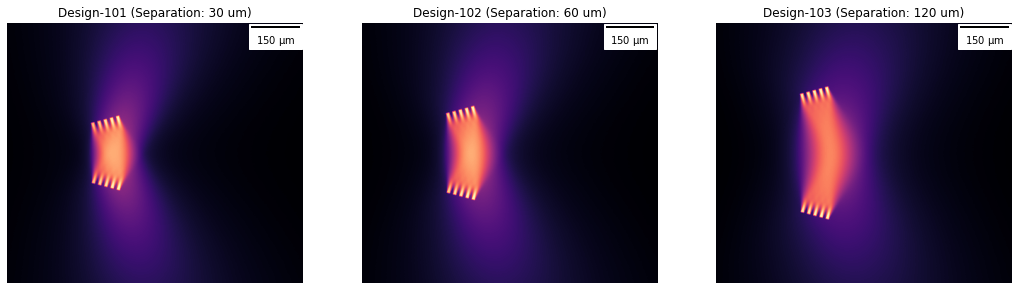

In [9]:
plot([image101, image102, image103], package='matplotlib')